In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
df=pd.read_csv('iris.csv', header=None)
df.columns=['꽃받침 길이','꽃받침 넓이','꽃잎 길이','꽃잎 넓이','품종']
df.head()

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이,품종
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df2=df.copy()

In [ ]:
df2['품종'].unique()  #품종 종류 확인

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#품종을 벡터화
df2['품종']=df2['품종'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
df2.head()

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이,품종
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃받침 길이  150 non-null    float64
 1   꽃받침 넓이  150 non-null    float64
 2   꽃잎 길이   150 non-null    float64
 3   꽃잎 넓이   150 non-null    float64
 4   품종      150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# X=df2[['꽃받침 길이','꽃받침 넓이','꽃잎 길이','꽃잎 넓이']]
X=df2.drop('품종',axis=1)  #위코드처럼 전부 불러와도되고 품종 drop으로 실행해도됨
y=df2['품종']
X.head()

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=42)
print(train_X.shape,test_X.shape)
print(train_y.shape,test_y.shape)

(120, 4) (30, 4)
(120,) (30,)


In [ ]:
#정규표준화
scaler=StandardScaler()
train_X=scaler.fit_transform(train_X)   #text_X에는 영향이 없음
test_X=scaler.transform(test_X)    #독립변수만 정규화진행함

### 정규화 비교
#### StandardScaler
- 변환 방식: 평균 0, 표준 편차 1
- 이상치 영향:    덜 받음
- 분포 형태:    유지

#### MinMaxScaler
- 변환 방식: 지정된 범위 (0~1)  
- 이상치 영향: 민감  
- 분포 형태: 변경 가능

#### 어떤 방법을 선택해야 할까요?

* 데이터의 특성과 분포, 그리고 사용할 모델을 고려하여 선택해야 합니다.
* 일반적으로 StandardScaler가 더 많이 사용됩니다. 특히, 데이터의 분포를 유지하고 이상치의 영향을 줄이고 싶을 때 적합합니다.
* MinMaxScaler는 데이터를 특정 범위로 제한하고 싶을 때 유용합니다. 예를 들어, 이미지 데이터를 0과 1 사이로 스케일링하는 경우에 사용됩니다.

In [ ]:
#인공신경망 제작
model=keras.Sequential([
    keras.layers.Dense(4),   #독립변수개수로함 4
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),   #Dropout의 숫자 조정하면서 가장 좋은거 찾기(0.2~0.5)
    keras.layers.Dense(3, activation='softmax')  #3은 뉴런개수(종속변수 종류수--species의 종류 3개임)
])
#softmax는 종속변수 다중 클래스 이전에 종속변수 정규화를 standardscaler로 해서 다중임
#softmax말고 sigmoid는 이진 클래스인데 종속변수 정규화를 minmaxscaler로 해서 이진으로 된거

In [ ]:
#인공신경망 컴파일
#sparse_categorical_crossentropy: 다항분류
#binary_crossentropy: 이항분류
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',  #분류할땐 crossentropy쓰고 회귀할땐 mse씀
             metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#인공신경망 학습
print("************************TRAINING START************************")
EPOCHS=100   #100번 학습
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history=model.fit(train_X, train_y, epochs=EPOCHS, validation_data=(test_X,test_y), callbacks=[early_stop])

************************TRAINING START************************
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 272ms/step - accuracy: 0.3717 - loss: 1.0707 - val_accuracy: 0.6000 - val_loss: 0.9277
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.5919 - loss: 0.9339 - val_accuracy: 0.8667 - val_loss: 0.8316
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.7594 - loss: 0.8699 - val_accuracy: 0.8667 - val_loss: 0.7512
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7665 - loss: 0.8083 - val_accuracy: 0.8667 - val_loss: 0.6833
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7902 - loss: 0.7388 - val_accuracy: 0.8667 - val_loss: 0.6260
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8033 - loss: 0.6745 - val_accuracy: 0.8667 - val_loss: 0.5787
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7644 - loss: 0.6720 - val_accuracy: 0.8667 - val_loss: 0.5393
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - 

In [ ]:
pred=model.predict(test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


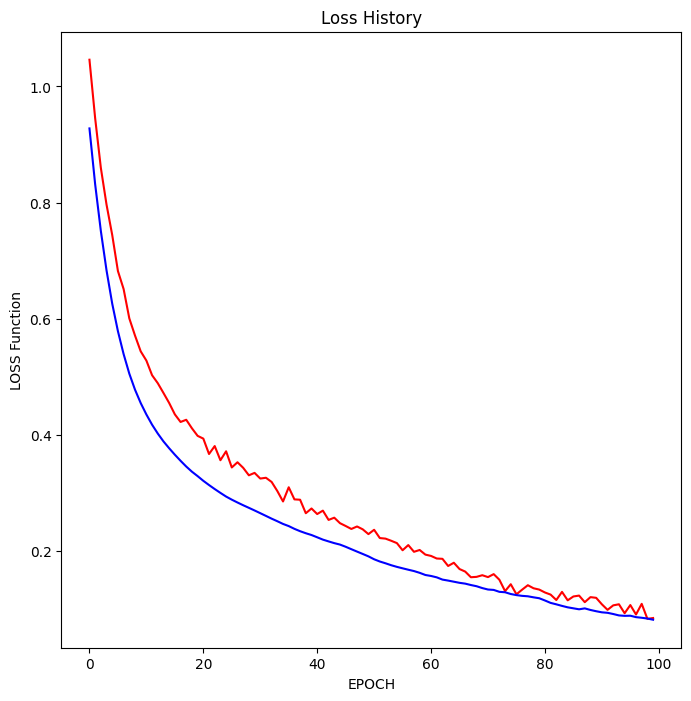

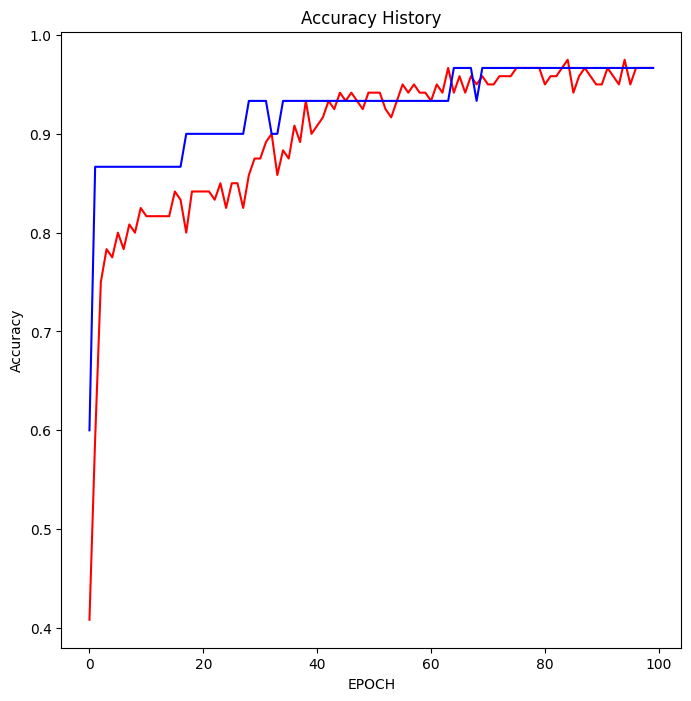

In [ ]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")        #학습 데이터의 Loss
plt.plot(validation_history, 'blue')  #테스트 데이터의 Loss
fig.savefig("train_history.png")      #이미지로 저장

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")        #학습 데이터의 Accuracy
plt.plot(validation_history, 'blue')  #테스트 데이터의 Accuracy
fig.savefig("accuracy_history.png")

In [ ]:
#iris유형매핑
iris_types={0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'}

#예측 결과에서 가장 높은 확률의 인덱스 찾고 매핑
predicted_classes=np.argmax(pred, axis=1)
predicted_iris_types=[iris_types[i] for i in predicted_classes]
correct_iris_types=[iris_types[i] for i in test_y]

list(zip(correct_iris_types, predicted_iris_types))

[('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-versicolor', 'Iris-virginica'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-virginica